## Observations and Insights 

In [51]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mice_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="left")
# Display the data table for preview
mice_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [40]:
# Checking the number of mice.
mice_tot = len(mice_data["Mouse ID"].value_counts())
print(f"There is {mice_tot} mice total.")

There is 249 mice total.


In [41]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

dup_mice_ids = mice_data.loc[mice_data.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
dup_mice_ids

array(['g989'], dtype=object)

In [43]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = mice_data[mice_data['Mouse ID'].isin(dup_mice_ids)==False]
cleaned_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [44]:
# Checking the number of mice in the clean DataFrame.
tot_clean_df = len(cleaned_df["Mouse ID"].unique())
print(f"There are {tot_clean_df} mice total in the clean DataFrame.")

There are 248 mice total in the clean DataFrame.


## Summary Statistics

In [45]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

#Finding the mean
df_mean = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()

#Finding the median
df_median = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()

#Finding the variance
df_variance = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()

#Finding the standard deviation value/s
df_stdv = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()

#Finding the standard error of mean (SEM) value/s
df_sem = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.
summary_results_df = pd.DataFrame({"Mean": df_mean, "Median": df_median, "Variance": df_variance, 
                                 "STDV": df_stdv, "SEM": df_sem})


In [46]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_results_df
# Using the aggregation method, produce the same summary statistics in a single line


,Mean,Median,Variance,STDV,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

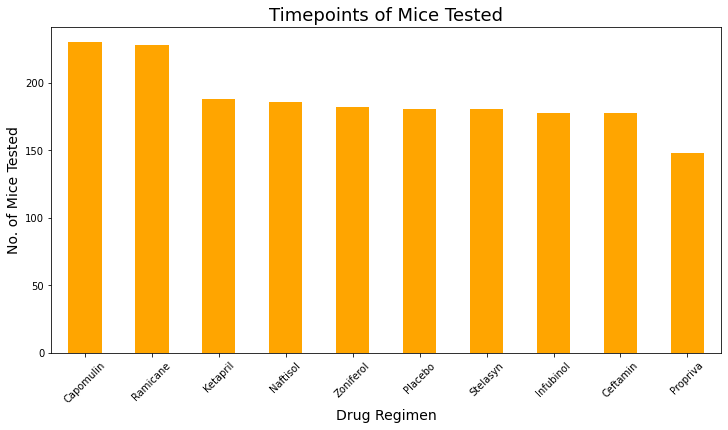

In [97]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

number = cleaned_df['Drug Regimen'].value_counts()
number.plot(kind="bar", color="orange", figsize=(12,6))
plt.xticks(rotation=45)
plt.xlabel("Drug Regimen", fontsize=14)
plt.ylabel("No. of Mice Tested", fontsize=14)
plt.title("Timepoints of Mice Tested", fontsize=18)
plt.show()


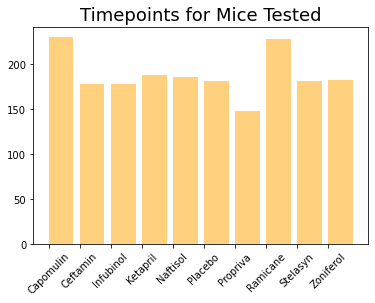

In [96]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

#Grouping by drug
groups_mice = cleaned_df.groupby("Drug Regimen")

#regimen totals
tot_reg = groups_mice["Timepoint"].count()

#making a list for y
y_axis = list(tot_reg)

#pulling data for x 
data_x = tot_reg.reset_index()

#making a list for x
data_x_list = list(data_x["Drug Regimen"])

x_axis = np.arange(len(data_x_list))

#Checking results of chart
plt.bar(x_axis, y_axis, color='orange', alpha=0.5, align="edge",)

#Adding drug labels to x axis 
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, data_x_list)
plt.xticks(rotation=45)
plt.title("Timepoints for Mice Tested", fontsize=18)

#diplay graph
plt.show()

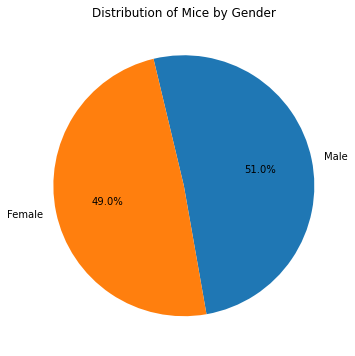

In [81]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

#finding gender of mice 
mice_gender = cleaned_df["Sex"].value_counts()

#making pie chart + formatting 
mice_gender.plot(kind="pie", y='Count', title="Distribution of Mice by Gender", startangle=280, figsize=(12,6), autopct = "%1.1f%%")
plt. ylabel("")

#Checking results of group
plt.show()

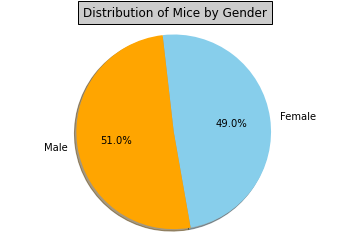

In [94]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#finding gender of mice
mice_gender = (cleaned_df.groupby(["Sex"]).count()).reset_index()
mice_gender.head()

#finding totals of gender
mice_gender = mice_gender[["Sex","Mouse ID"]]
mice_gender = mice_gender.rename(columns={"Mouse ID": "Count"})
mice_gender.head()

#creating axises 
labels = mice_gender["Sex"]
size = mice_gender["Count"]

#colors of chart
colors = ["skyblue", "orange"]

#checking results of chart
plt.pie(size, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=280)
plt.axis("equal")
plt.title("Distribution of Mice by Gender", bbox={'facecolor':'0.8', 'pad':5})

#displaying the chart
plt.show()


## Quartiles, Outliers and Boxplots

In [104]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

drug_reg = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drug_reg_df = cleaned_df[cleaned_df["Drug Regimen"].isin(drug_reg)]
max_tp = pd.DataFrame(drug_reg_df.groupby(["Mouse ID"])["Timepoint"].max())
max_tp

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df = pd.merge(drug_reg_df, max_tp, on=["Mouse ID", "Timepoint"], how="inner")
merged_df = merged_df.drop(["Sex", "Age_months", "Weight (g)", "Timepoint", "Metastatic Sites"], axis=1)


#Checking DF results 
merged_df.head()



,Mouse ID,Drug Regimen,Tumor Volume (mm3)
0,k403,Ramicane,22.050126
1,s185,Capomulin,23.343598
2,x401,Capomulin,28.484033
3,m601,Capomulin,28.430964
4,g791,Ramicane,29.128472


In [112]:
# Put treatments into a list for for loop (and later for plot labels)

drug_reg = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
t_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for med in drug_reg:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    med_df = merged_df.loc[merged_df["Drug Regimen"]==med]
    med_vol = med_df["Tumor Volume (mm3)"]
    
    # add subset 
    t_vol.append(med_vol)
t_vol

[1     23.343598
 2     28.484033
 3     28.430964
 6     30.485985
 10    31.023923
 12    31.896238
 13    32.377357
 14    33.329098
 16    34.455298
 20    37.311846
 22    36.041047
 24    37.074024
 28    38.846876
 30    38.939633
 31    38.982878
 32    38.753265
 34    38.125164
 35    39.952347
 36    40.658124
 37    40.159220
 38    40.728578
 39    41.483008
 40    41.581521
 45    47.685963
 82    46.539206
 Name: Tumor Volume (mm3), dtype: float64,
 0     22.050126
 4     29.128472
 5     30.276232
 7     30.564625
 8     30.638696
 9     31.560470
 11    31.095335
 15    33.397653
 17    32.978522
 18    33.562402
 19    36.134852
 21    38.810366
 23    37.225650
 25    36.374510
 26    36.561652
 27    37.311236
 29    38.342008
 33    38.407618
 41    40.659006
 42    40.667713
 43    45.220869
 44    43.047543
 46    43.419381
 47    43.166373
 48    44.183451
 Name: Tumor Volume (mm3), dtype: float64,
 49    67.973419
 50    65.525743
 52    57.031862
 53    66.083

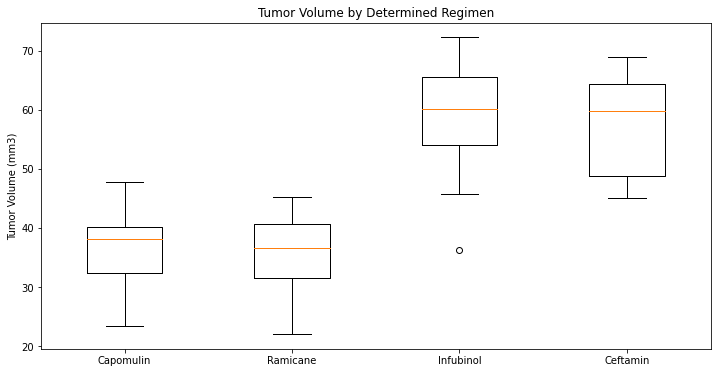

In [114]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots(figsize=(12,6))
ax1.set_title("Tumor Volume by Determined Regimen")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.boxplot(t_vol)
plt.xticks(range(1, len(drug_reg) + 1), drug_reg)
plt.show()

## Line and Scatter Plots

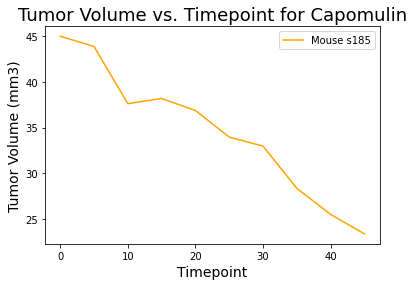

In [122]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_id = cleaned_df.loc[cleaned_df["Mouse ID"]=="s185"]
mouse_id

x_ax = mouse_identification["Timepoint"]
y_ax = mouse_identification["Tumor Volume (mm3)"]

line_graph, = plt.plot(x_ax, y_ax, color="orange", label="Mouse s185")
plt.title("Tumor Volume vs. Timepoint for Capomulin", fontsize=18)
plt.xlabel("Timepoint", fontsize=14)
plt.ylabel("Tumor Volume (mm3)", fontsize=14)
plt.legend(handles=[line_graph], loc="best")
plt.show()
 

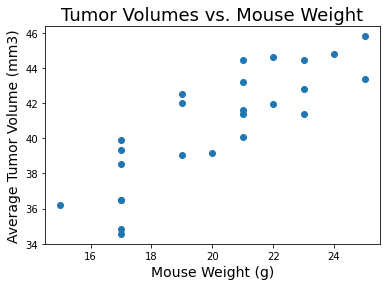

In [128]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
reg_scat = cleaned_df.loc[cleaned_df["Drug Regimen"]=="Capomulin"]
reg_scat

t_avg = reg_scat.groupby(["Mouse ID"]).mean()
t_avg

plt.scatter(t_avg["Weight (g)"], t_avg["Tumor Volume (mm3)"])
plt.title(("Tumor Volumes vs. Mouse Weight"), fontsize=18)
plt.xlabel(("Mouse Weight (g)"), fontsize=14)
plt.ylabel(("Average Tumor Volume (mm3)"), fontsize=14)

#Checking chart results 
plt.show()

## Correlation and Regression

The correlation between the weight of the mouse and volume of the tumor is 0.84.


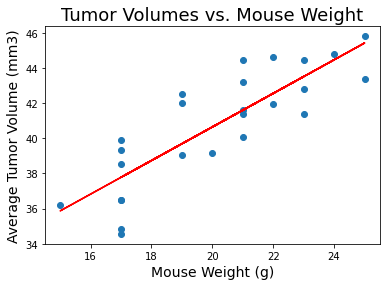

In [139]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
mouse_coor = round(st.pearsonr(t_avg["Weight (g)"], t_avg["Tumor Volume (mm3)"])[0],2)
print(f'The correlation between the weight of the mouse and volume of the tumor is {mouse_coor}.')

mouse_lin_reg = st.linregress(t_avg["Weight (g)"], t_avg["Tumor Volume (mm3)"])
mouse_lin_reg

y_axis = t_avg["Weight (g)"] * mouse_lin_reg[0] + mouse_lin_reg[1]
y_axis
plt.scatter(t_avg["Weight (g)"], t_avg["Tumor Volume (mm3)"])
plt.plot(t_avg["Weight (g)"], y_axis, color="r")
plt.title("Tumor Volumes vs. Mouse Weight", fontsize=18)
plt.xlabel("Mouse Weight (g)", fontsize=14)
plt.ylabel("Average Tumor Volume (mm3)", fontsize=14)
plt.show()